In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv(r'D:\GUVI\Project\Warehouse\data\warehouse_products.csv')

In [27]:
data.head()

,Product ID,Height (cm),Width (cm),Depth (cm),Avg Daily Demand,Product Category,Score
0,P20106,35.436002,22.622569,33.657885,49.123508,Electronics,6.697377
1,P41070,28.556396,24.461528,44.912779,16.094638,Electronics,86.751324
2,P29033,28.387143,16.138052,18.433578,17.235752,Food,39.181937
3,P47714,23.283766,24.277033,26.857256,6.472163,Clothing,36.539454
4,P14692,9.607678,23.973594,37.116032,15.737616,Food,54.279738


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        1500 non-null   object 
 1   Height (cm)       1455 non-null   float64
 2   Width (cm)        1455 non-null   float64
 3   Depth (cm)        1455 non-null   float64
 4   Avg Daily Demand  1455 non-null   float64
 5   Product Category  1500 non-null   object 
 6   Score             1500 non-null   float64
dtypes: float64(5), object(2)
memory usage: 82.2+ KB


In [29]:
data.isnull().sum()

Product ID           0
Height (cm)         45
Width (cm)          45
Depth (cm)          45
Avg Daily Demand    45
Product Category     0
Score                0
dtype: int64

In [ ]:
data[data.isnull().any(axis=1)].head() #Patterns in Missing Data

,Product ID,Height (cm),Width (cm),Depth (cm),Avg Daily Demand,Product Category,Score
11,P95243,17.031681,18.475975,NaN,3.666985,Furniture,82.932746
13,P11540,28.854602,NaN,45.443048,70.127337,Electronics,32.575985
21,P11982,45.860168,NaN,5.628548,0.720149,Electronics,16.642019
23,P91013,15.846293,18.536828,NaN,43.521184,Food,23.126430
33,P54326,17.621845,26.080448,32.888101,NaN,Food,97.094028


In [31]:
num_col = ['Height (cm)', 'Width (cm)', 'Depth (cm)', 'Avg Daily Demand']

for col in num_col:
    data[col] = data.groupby('Product Category')[col].transform(lambda x:x.fillna(x.median()))

In [32]:
data.isnull().sum()

Product ID          0
Height (cm)         0
Width (cm)          0
Depth (cm)          0
Avg Daily Demand    0
Product Category    0
Score               0
dtype: int64

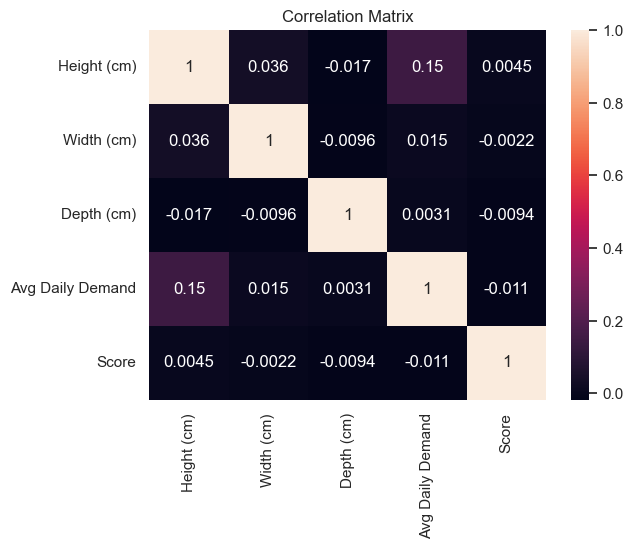

In [ ]:
corr = data[['Height (cm)', 'Width (cm)', 'Depth (cm)', 'Avg Daily Demand', 'Score']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

'''
--> Width, Depth, and Avg Daily Demand are even less correlated
--> There is no strong linear relationship between Score and any of the other features
'''

In [36]:
from sklearn.feature_selection import mutual_info_regression

X = data[['Height (cm)', 'Width (cm)', 'Depth (cm)', 'Avg Daily Demand']]
y = data['Score']
mi = mutual_info_regression(X, y)
print(mi)


[0.         0.01630134 0.         0.        ]


From this we concluding that score is not releated to this data set

In [43]:
data = data.drop(columns=['Score'])


In [ ]:
(data[col] < 0).sum()

Height (cm)          1
Width (cm)          12
Depth (cm)           6
Avg Daily Demand     0
dtype: int64

In [52]:
data[data[col] < 0] = 0


In [53]:
(data[col] < 0).sum()

Height (cm)         0
Width (cm)          0
Depth (cm)          0
Avg Daily Demand    0
dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        1500 non-null   object 
 1   Height (cm)       1500 non-null   float64
 2   Width (cm)        1500 non-null   float64
 3   Depth (cm)        1500 non-null   float64
 4   Avg Daily Demand  1500 non-null   float64
 5   Product Category  1500 non-null   object 
dtypes: float64(4), object(2)
memory usage: 70.4+ KB


In [ ]:
data.to_csv('data/data_cleaned.csv', , index=False)